In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

conn = pyodbc.connect('DRIVER={SQL Server};'
                      'SERVER=DESKTOP-7QR5TL6;'
                      'DATABASE=DWH_SAP;'
                      'Trusted_Connection=yes')                                                                                                              # PASSWORD = '<password>

In [ ]:
# query_invoices = "SELECT * FROM dbo.Dim_Supplier_Invoices"
# df = pd.read_sql(query_invoices, conn)

# # Chargement des données de litiges
# query_disputes = """
# SELECT
#     SupplierID,
#     COUNT(*) AS TotalDisputes,
#     AVG(DATEDIFF(day, DisputeDate, ResolutionDate)) AS AvgDisputeDuration,
#     SUM(CASE WHEN Status = 'Resolved' THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS DisputeResolutionRate
# FROM [DWH_SAP].[dbo].[Dim_Disputes]
# GROUP BY SupplierID
# """
# df_disputes = pd.read_sql(query_disputes, conn)

In [ ]:
# df['DueDate'] = pd.to_datetime(df['DueDate'])
# df['PaymentDueDate'] = pd.to_datetime(df['PaymentDueDate'])
# df['Payment_Delay'] = (df['PaymentDueDate'] - df['DueDate']).dt.days

# df['Payment_Status_Code'] = df['PaymentStatus'].map({
#     'Paid': 1,
#     'Partial': 0.5,
#     'Unpaid': 0,
#     np.nan: 0
# }).fillna(0)

# df['Payment_Score'] = df['Payment_Status_Code'] * (1 - np.log1p(np.abs(df['Payment_Delay'])) / 10)
# df['Problem_Payment'] = ((df['Payment_Delay'] > 30) | (df['Payment_Status_Code'] < 1)).astype(int)

# # Fusion avec les données de litiges
# df = pd.merge(df, df_disputes, left_on='Fk_Supplier', right_on='SupplierID', how='left')

# # Agrégation par fournisseur avec indicateurs de litiges
# df_cluster = df.groupby("Fk_Supplier").agg({
#     "InvoiceID": "count",
#     "Payment_Delay": ["mean", "std", lambda x: (x > 0).mean()],
#     "PaymentStatus": [
#         lambda x: (x == "Paid").mean(),
#         lambda x: (x == "Partial").mean(),
#         lambda x: (x == "Unpaid").mean()
#     ],
#     "Approved": "mean",
#     "Problem_Payment": "mean",
#     "TotalDisputes": "sum",
#     "AvgDisputeDuration": "mean",
#     "DisputeResolutionRate": "mean"
# }).reset_index()

In [ ]:
# # Renommage des colonnes
# df_cluster.columns = [
#     'Fk_Supplier',
#     'Total_Invoices',
#     'Mean_Payment_Delay',
#     'Std_Payment_Delay',
#     'Late_Payment_Ratio',
#     'Paid_Ratio',
#     'Partial_Payment_Ratio',
#     'Unpaid_Ratio',
#     'Approval_Rate',
#     'Problem_Payment_Ratio',
#     'Total_Disputes',
#     'Avg_Dispute_Duration',
#     'Dispute_Resolution_Rate'
# ]

# # Feature engineering supplémentaire
# df_cluster['Payment_Consistency'] = 1 / (1 + df_cluster['Std_Payment_Delay'])
# df_cluster['Dispute_Intensity'] = df_cluster['Total_Disputes'] / df_cluster['Total_Invoices']

# # Score de risque amélioré intégrant les litiges
# df_cluster['Financial_Risk_Score'] = (
#     0.3 * df_cluster['Unpaid_Ratio'] +
#     0.25 * df_cluster['Late_Payment_Ratio'] +
#     0.15 * df_cluster['Partial_Payment_Ratio'] +
#     0.1 * (1 - df_cluster['Approval_Rate']) +
#     0.1 * df_cluster['Dispute_Intensity'] +
#     0.1 * (1 - df_cluster['Dispute_Resolution_Rate'])
# )

# # Gestion des valeurs manquantes
# df_cluster.fillna({
#     'Std_Payment_Delay': df_cluster['Mean_Payment_Delay'],
#     'Payment_Consistency': 0,
#     'Total_Disputes': 0,
#     'Avg_Dispute_Duration': 0,
#     'Dispute_Resolution_Rate': 1,
#     'Dispute_Intensity': 0,
#     'Financial_Risk_Score': df_cluster['Financial_Risk_Score'].median()
# }, inplace=True)

In [ ]:
# df = df_cluster

In [ ]:
#df = pd.read_csv('/content/Clustering.csv')

**Affichage des données**

In [ ]:
df.head(10)

,Fk_Supplier,Total_Invoices,Mean_Payment_Delay,Std_Payment_Delay,Late_Payment_Ratio,Paid_Ratio,Partial_Payment_Ratio,Unpaid_Ratio,Approval_Rate,Problem_Payment_Ratio,Total_Disputes,Avg_Dispute_Duration,Dispute_Resolution_Rate,Payment_Consistency,Dispute_Intensity,Financial_Risk_Score
0,AUC529,13,30.0,0.0,1.0,0.538462,0.0,0.461538,0.538462,0.461538,9659.0,956.0,0.0,1.0,743.0,74.834615
1,CAR181,7,30.0,0.0,1.0,0.428571,0.0,0.571429,0.285714,0.571429,4620.0,913.0,0.0,1.0,660.0,66.592857
2,LEC604,10,30.0,0.0,1.0,0.500000,0.0,0.500000,0.600000,0.500000,7180.0,906.0,0.0,1.0,718.0,72.340000
3,MAG105,6,30.0,0.0,1.0,0.333333,0.0,0.666667,0.333333,0.666667,4254.0,914.0,0.0,1.0,709.0,71.516667
4,MON248,11,30.0,0.0,1.0,0.818182,0.0,0.181818,0.454545,0.181818,7656.0,945.0,0.0,1.0,696.0,70.059091
5,S1001,15,30.0,0.0,1.0,0.533333,0.0,0.466667,0.400000,0.466667,10140.0,916.0,0.0,1.0,676.0,68.150000
6,S1002,10,30.0,0.0,1.0,0.600000,0.0,0.400000,0.500000,0.400000,7130.0,972.0,0.0,1.0,713.0,71.820000
7,S1003,12,30.0,0.0,1.0,0.833333,0.0,0.166667,0.500000,0.166667,8388.0,983.0,0.0,1.0,699.0,70.350000
8,S1004,7,30.0,0.0,1.0,0.714286,0.0,0.285714,0.714286,0.285714,5047.0,983.0,0.0,1.0,721.0,72.564286
9,S1005,7,30.0,0.0,1.0,0.571429,0.0,0.428571,0.142857,0.428571,4655.0,984.0,0.0,1.0,665.0,67.064286


**On selection les colonnes numériques afin de vérifier l'éxistance des valeurs abérrantes**

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['Total_Invoices', 'Mean_Payment_Delay', 'Std_Payment_Delay',
       'Late_Payment_Ratio', 'Paid_Ratio', 'Partial_Payment_Ratio',
       'Unpaid_Ratio', 'Approval_Rate', 'Problem_Payment_Ratio',
       'Total_Disputes', 'Avg_Dispute_Duration', 'Dispute_Resolution_Rate',
       'Payment_Consistency', 'Dispute_Intensity', 'Financial_Risk_Score'],
      dtype='object')

**On affiche un boxplot pour chaque colonne numérique**

**On note que pas toutes les colonnes possèdes des valeurs abérrantes. Cependant, le reste des colonnes présentent plusieurs points hors les marges interquartiles.**

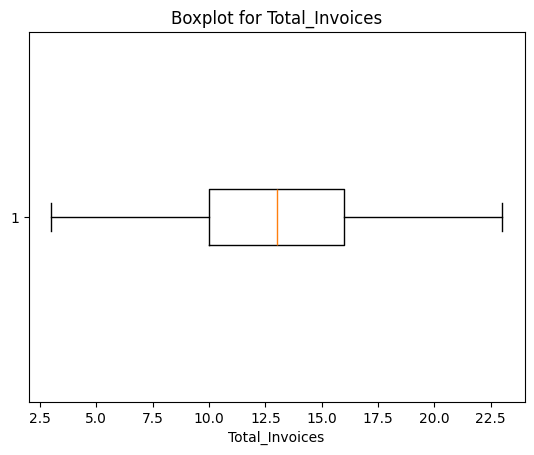

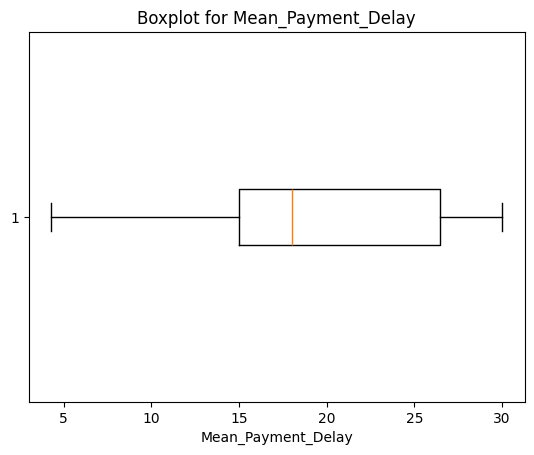

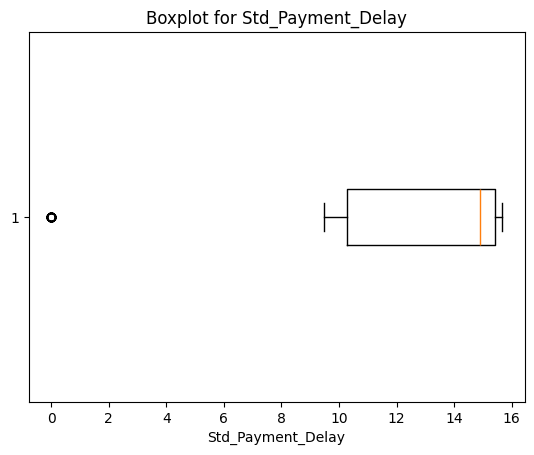

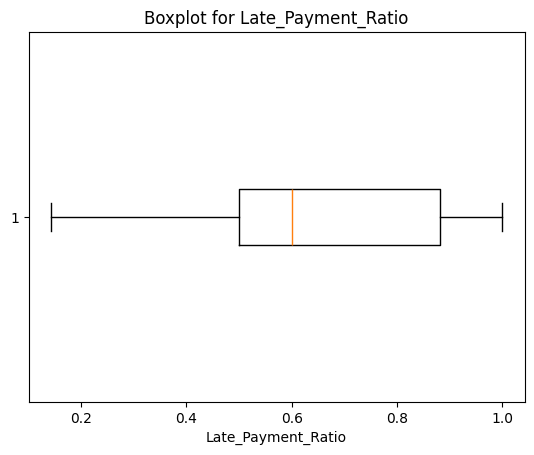

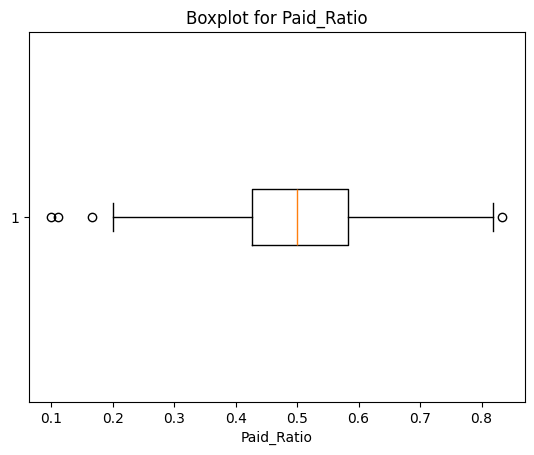

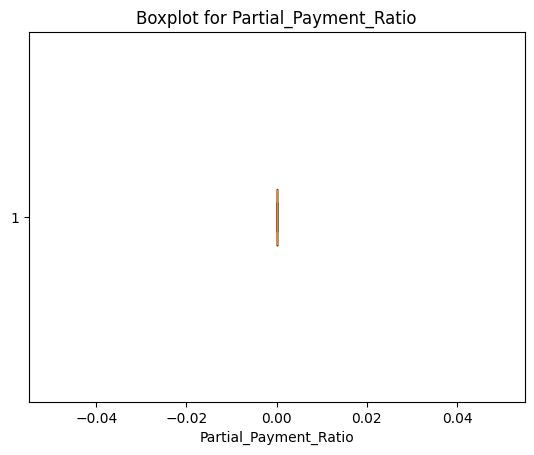

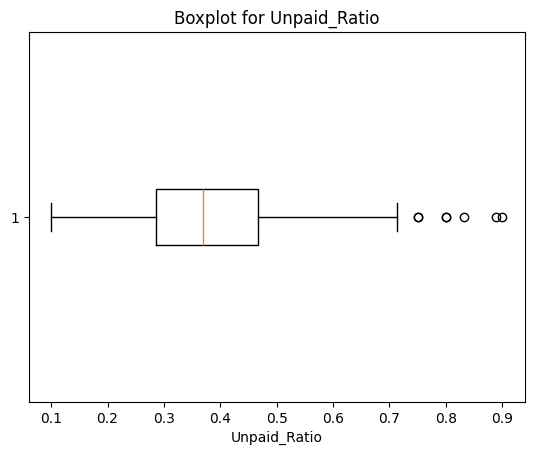

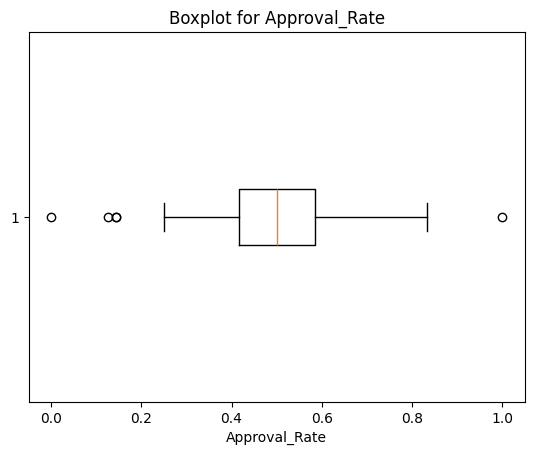

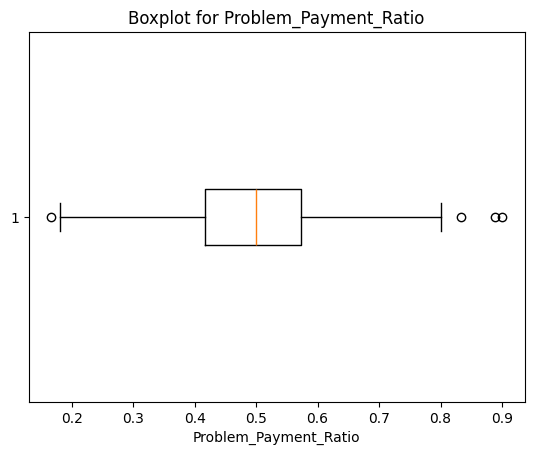

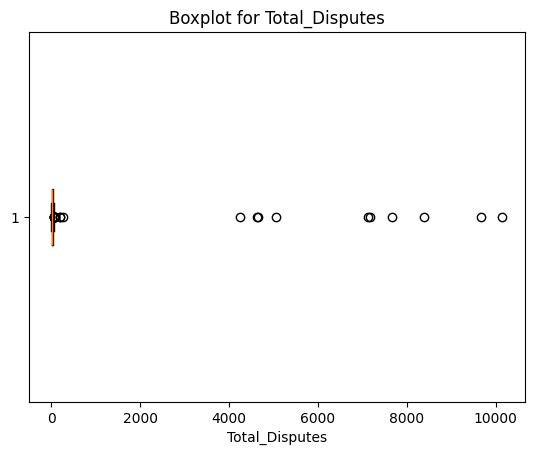

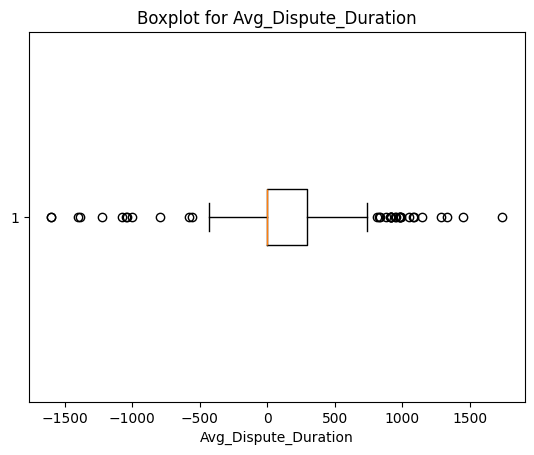

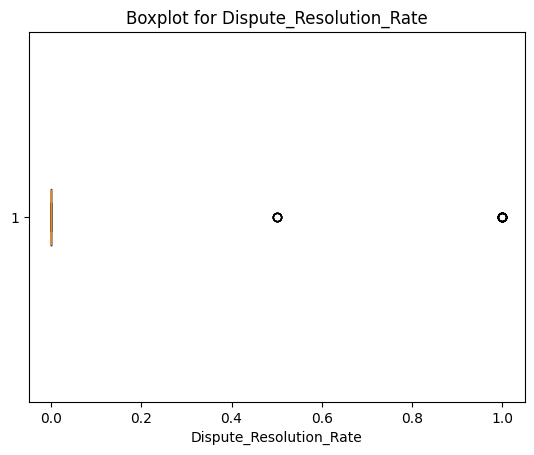

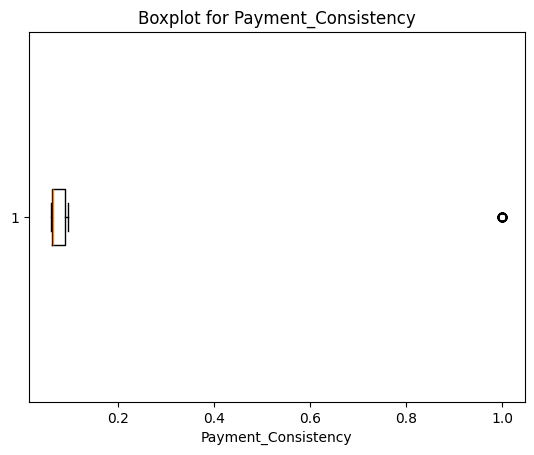

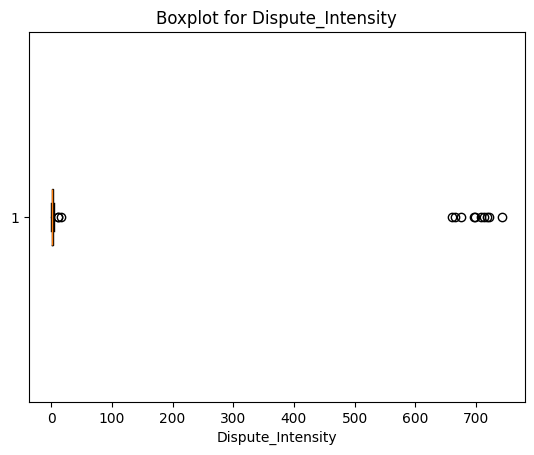

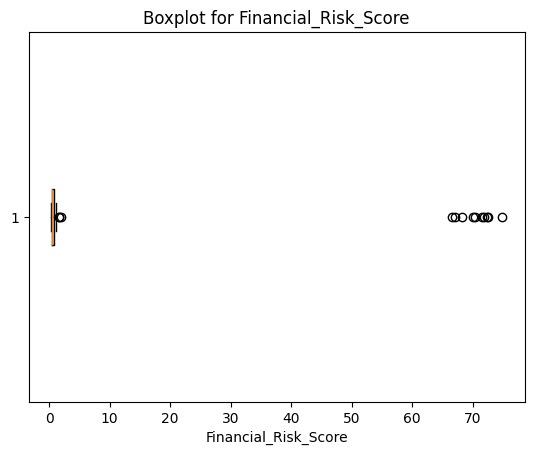

In [ ]:
for col in df[numeric_cols]:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

**Pour enlever les valeurs abérrantes, et spécificement pour notre cas ou elles sont nombreuses, on fera recours à la winsorization. La winsorisation est le processus de remplacement des valeurs extrêmes des données statistiques afin de limiter l'effet des valeurs aberrantes sur les calculs ou les résultats obtenus en utilisant ces données.**

In [ ]:
from scipy.stats.mstats import winsorize

### On définit cette fonction afin de detecter que les colonnes qui présentent des valeurs abérrantes. Rappelant que ces valeurs ce situent au-dessous du lower bound (Q1Q1 - 1.5 * IQR) et le Au-dessus du upperbound (Q3 + 1.5 * IQR)

In [ ]:
def detect_outliers_iqr(df, columns):
    outlier_columns = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
            outlier_columns.append(col)
    return outlier_columns

In [ ]:
outlier_columns = detect_outliers_iqr(df, numeric_cols)

**On réalise la winsorization des données avec les limites 0,1 dans les deux cotés. Cela indique que :**

**Les 10 % de valeurs les plus basses (inférieures au 10e percentile) sont remplacées par la valeur correspondant au 10e percentile.**

**Les 10 % de valeurs les plus élevées (supérieures au 90e percentile) sont remplacées par la valeur correspondant au 90e percentile.**

**Au lieu de supprimer des points de données, la winsorisation limite les valeurs extrêmes, conservant ainsi le même nombre d'observations tout en rendant l'ensemble de données plus résistant aux valeurs aberrantes.**

In [ ]:
def winsorize_outliers(df, outlier_columns, limits=(0.1, 0.1)):

    for col in outlier_columns:
        df[col] = winsorize(df[col], limits=limits)
    return df

In [ ]:
df = winsorize_outliers(df, outlier_columns)

**Après winsorization, on note la diminution significative du nombre des valeurs abérantes. Ce résultat est considéré comme l'optimale après le test de plusieurs limites de la fonction winsorize_outliers**

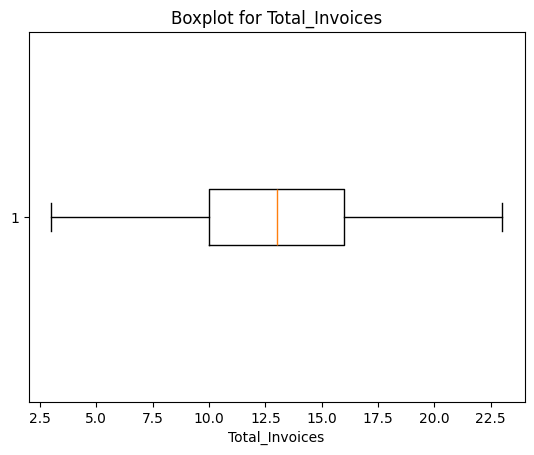

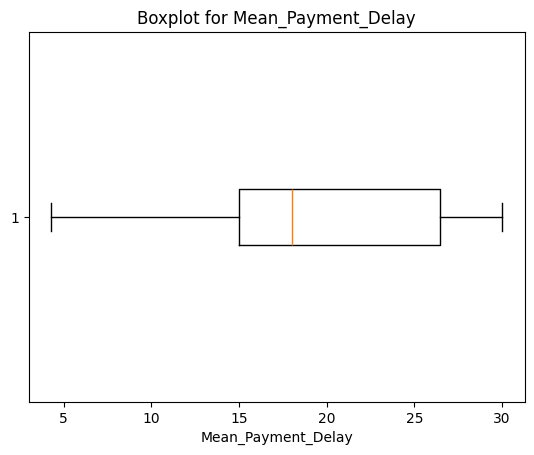

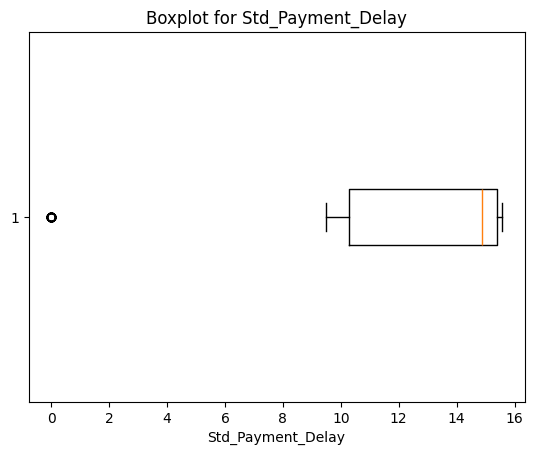

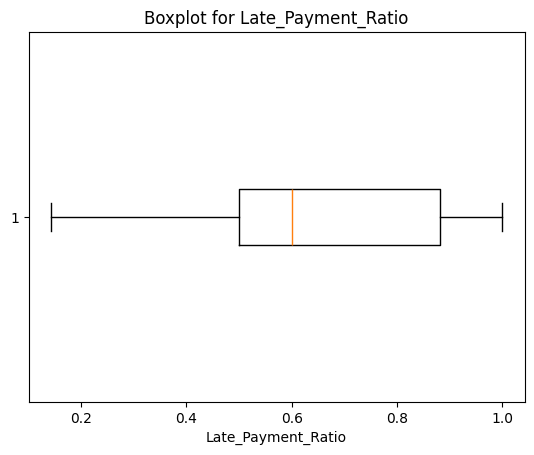

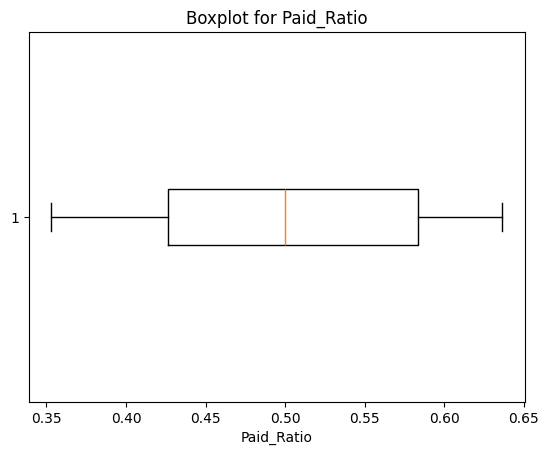

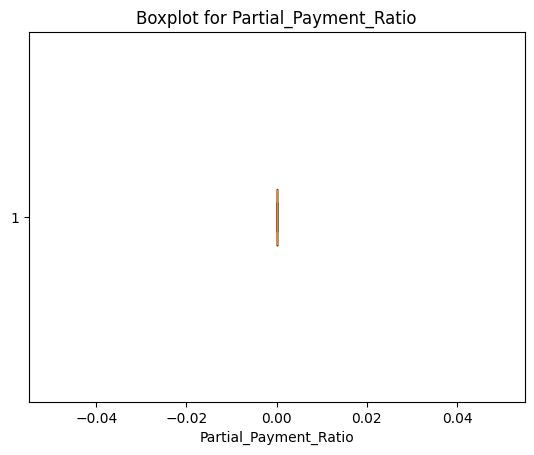

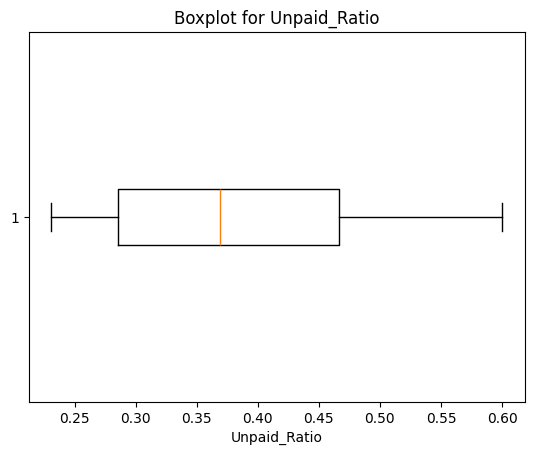

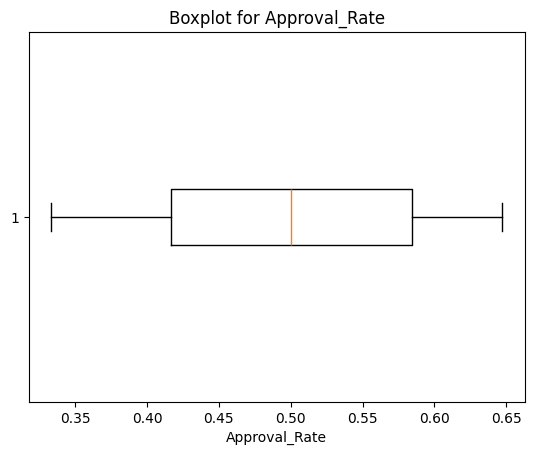

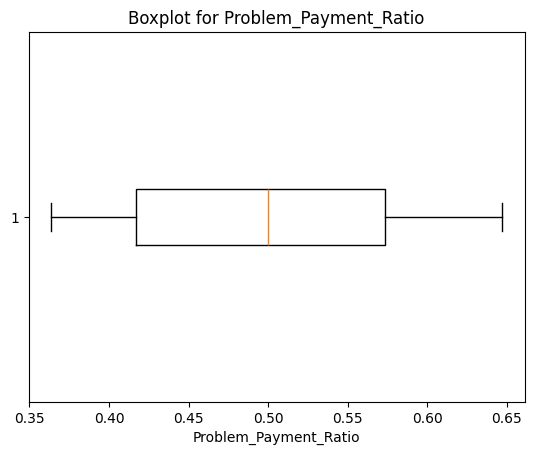

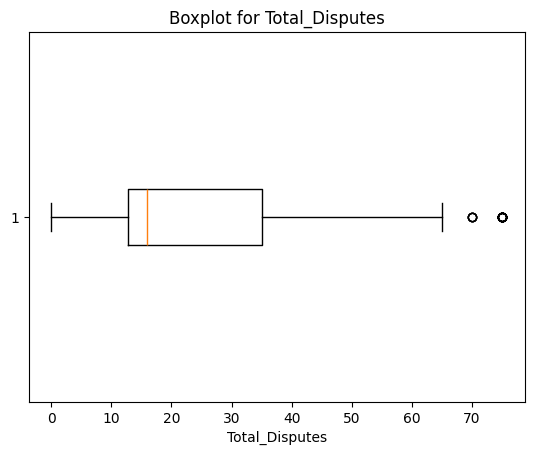

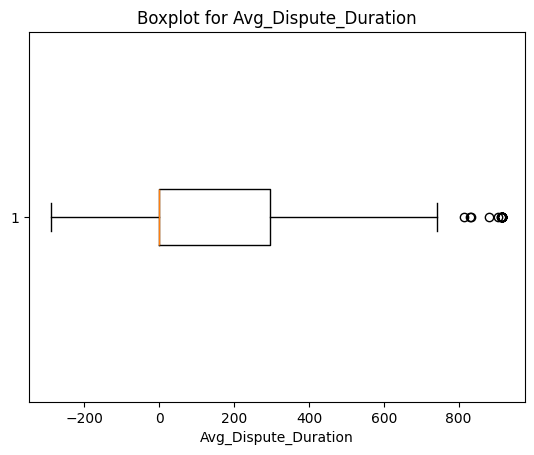

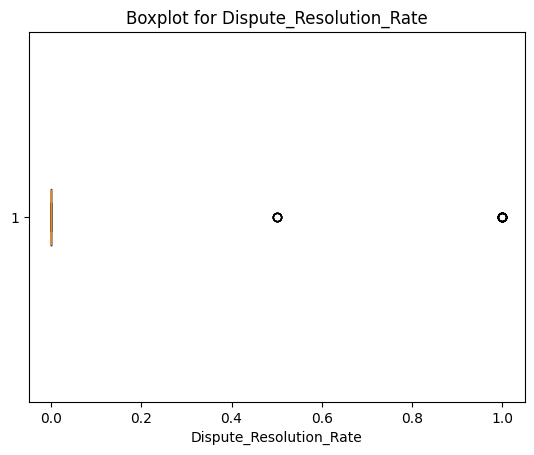

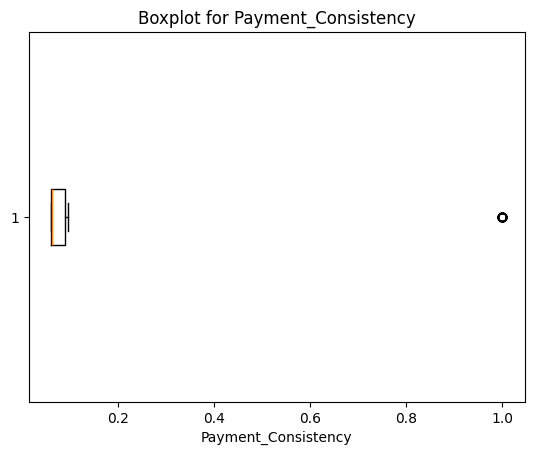

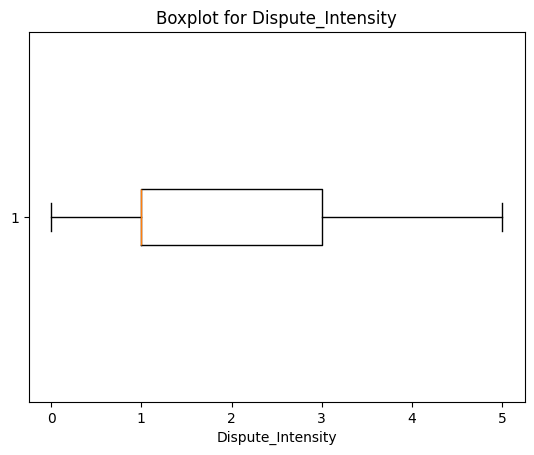

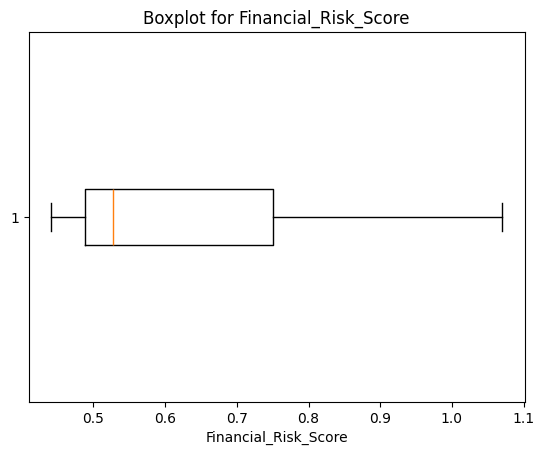

In [ ]:
for col in df[numeric_cols]:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

In [ ]:
df[numeric_cols].skew()

,0
Total_Invoices,-0.073793
Mean_Payment_Delay,0.279330
Std_Payment_Delay,-1.134894
Late_Payment_Ratio,0.279330
Paid_Ratio,-0.087395
Partial_Payment_Ratio,0.000000
Unpaid_Ratio,0.456921
Approval_Rate,0.009159
Problem_Payment_Ratio,0.087395
Total_Disputes,1.148362


In [ ]:
# # scaler = StandardScaler()
# cluster_features = [
#     'Total_Invoices',
#     'Mean_Payment_Delay',
#     'Std_Payment_Delay',
#     'Paid_Ratio',
#     'Unpaid_Ratio',
#     'Approval_Rate',
#     'Payment_Consistency',
#     'Financial_Risk_Score',
#     'Total_Disputes',
#     'Dispute_Intensity',
#     'Avg_Dispute_Duration'
# ]

In [ ]:
# df[cluster_features] = scaler.fit_transform(df[cluster_features])


**On définit les features pour nos clusters**

In [ ]:
features = [
    'Mean_Payment_Delay',
    'Paid_Ratio',
    'Unpaid_Ratio',
    'Financial_Risk_Score',
    'Dispute_Intensity',
    'Avg_Dispute_Duration'
]
X = df[features]

**On applique dans cette cellule deux algorithmes : KMeans avec 2 clusters et PCA pour la réduction de la dimensionnalité**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Réduction PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
plt.figure(figsize=(14, 9))
colors = ['#4daf4a', '#e41a1c']  # Deux couleurs seulement
cluster_names = {
    0: "Fournisseurs Fiables",
    1: "Fournisseurs à Risque"
}

<Figure size 1400x900 with 0 Axes>

**On visualise les données avec PCA et KMeans pour deux clusters et on obtien aussi les centroïdes.**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


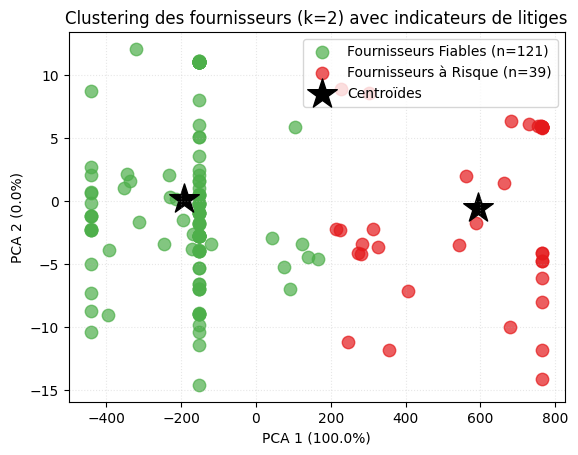

In [ ]:
for i in range(2):  # Seulement 2 clusters
    cluster_data = X_pca[df['Cluster'] == i]
    plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        c=colors[i],
        label=f"{cluster_names[i]} (n={(df['Cluster'] == i).sum()})",
        s=80,
        alpha=0.7
    )
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    c='black', marker='*', s=500,
    label='Centroïdes'
)
plt.xlabel(f"PCA 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PCA 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title('Clustering des fournisseurs (k=2) avec indicateurs de litiges')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.3)
plt.show()

Au dessous sont les métriques d'évaluation du clustering: Silhouette Score : 0.791
- Très bon score (proche de 1).
- Cela signifie que les points sont très bien regroupés dans leurs clusters et clairement séparés des autres clusters.
- Les frontières entre les groupes sont très nettes.

Calinski-Harabasz Index : 758.1
- Très élevé.
- Cela indique que :

La densité à l’intérieur de chaque cluster est forte (points proches entre eux).
La séparation entre clusters est large. => Les clusters sont donc cohérents et bien distincts.

Davies-Bouldin Score : 0.362
- Assez bas (plus c’est bas, mieux c’est).
- Cela veut dire que :

Chaque cluster est bien compact.

Les clusters sont très différents les uns des autres, avec peu de recouvrement.

In [ ]:
print("\nÉvaluation finale du clustering (k=2):")
print(f"- Silhouette Score: {silhouette_score(X, df['Cluster']):.3f}")
print(f"- Calinski-Harabasz: {calinski_harabasz_score(X, df['Cluster']):.1f}")
print(f"- Davies-Bouldin: {davies_bouldin_score(X, df['Cluster']):.3f}")


Évaluation finale du clustering (k=2):
- Silhouette Score: 0.791
- Calinski-Harabasz: 758.1
- Davies-Bouldin: 0.362


In [ ]:
print("\nCaractéristiques moyennes par cluster:")
cluster_stats = df.groupby('Cluster').agg({
    'Mean_Payment_Delay': 'mean',
    'Paid_Ratio': 'mean',
    'Unpaid_Ratio': 'mean',
    'Financial_Risk_Score': 'mean',
    'Total_Disputes': 'mean',
    'Dispute_Intensity': 'mean',
    'Avg_Dispute_Duration': 'mean'
})
print(cluster_stats)


Caractéristiques moyennes par cluster:
         Mean_Payment_Delay  Paid_Ratio  Unpaid_Ratio  Financial_Risk_Score  \
Cluster                                                                       
0                 18.891893    0.496682      0.382779              0.591668   
1                 22.615500    0.511420      0.398265              0.749101   

         Total_Disputes  Dispute_Intensity  Avg_Dispute_Duration  
Cluster                                                           
0             21.727273           1.652893            -40.214876  
1             38.743590           2.769231            745.641026  


In [ ]:
df['PCA_X'] = np.round(X_pca[:, 0].astype(np.float64), 6)  # 6 décimales
df['PCA_Y'] = np.round(X_pca[:, 1].astype(np.float64), 6)

In [ ]:
df['PCA_X_Formatted'] = df['PCA_X'].apply(lambda x: f"{x:.6f}".replace('.', ','))
df['PCA_Y_Formatted'] = df['PCA_Y'].apply(lambda x: f"{x:.6f}".replace('.', ','))

In [ ]:
df['Cluster_Name'] = df['Cluster'].map({
    0: "Fournisseur Fiable",
    1: "Fournisseur à Risque"
})

In [ ]:
export_columns = [
    'Fk_Supplier',
    'PCA_X',
    'PCA_Y',
    'PCA_X_Formatted',
    'PCA_Y_Formatted',
    'Cluster',
    'Cluster_Name'
]

In [ ]:
df_export = df[export_columns]

In [ ]:
df_export.to_csv('export_clust.csv', index=False)